In [12]:
import requests
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import shapely as shp

In [13]:
key = 'OyqN6Dd412GP0LtckkGRFIP1CUzlDq2e'

In [132]:
url = 'https://api.tomtom.com/traffic/services/5/incidentDetails\
?bbox=77%2C28%2C77.5%2C28.5\
&fields=%7Bincidents%7Btype%2Cgeometry%7Btype%2Ccoordinates%7D%2Cproperties%7Bid%2CiconCategory%2CmagnitudeOfDelay%2Cevents%7Bdescription%2Ccode%7D%2CstartTime%2CendTime%2Cfrom%2Cto%2Clength%2Cdelay%2CroadNumbers%2Caci%7BprobabilityOfOccurrence%2CnumberOfReports%2ClastReportTime%7D%7D%7D%7D\
&language=en-US\
&key=ap1FCA209iY5tEZ0bbDCWCAfA4zI4X1Q'

In [133]:
traffic = json.loads(requests.get(url).content)

In [134]:
property_keys = ['id', 'iconCategory', 'magnitudeOfDelay', 'startTime', 'endTime', 'from', 'to', 'length', 'delay', 'events', 'aci']

out = []
i = 0
for incident in traffic.get('incidents'):
    
#     print(i)
    
    props = incident.get('properties')
    
    for key in props.keys():
        props[key] = props.get(key)
#         print(props[key])
    
    del props['roadNumbers']
    del props['events']

    points = []
    for coord in incident.get('geometry').get('coordinates'):
        points.append(shp.geometry.Point(coord))
#     print(out) 
    line = shp.geometry.LineString(points)
    props['geometry'] = [line]
    out.append(pd.DataFrame(props, index=[i]))
    
    i += 1

In [135]:
df = pd.concat(out)
gdf = gpd.GeoDataFrame(df, geometry=df.geometry)
gdf.head()

,id,iconCategory,magnitudeOfDelay,startTime,endTime,from,to,length,delay,aci,geometry
0,9d6b3cf808972df251b504334471a70f,6,1,2021-06-27T13:36:00Z,2021-06-27T14:42:00Z,Rajendra Park Block-F Road,Ratan Vihar Road,655.009000,175,None,"LINESTRING (77.00757 28.49045, 77.00778 28.490..."
1,17708d78876f2c52d5f0bb23fde3c985,6,1,2021-06-27T13:35:00Z,2021-06-27T14:41:00Z,Ratan Vihar Road,Rajendra Park Block-F Road,674.653019,159,None,"LINESTRING (77.01153 28.49533, 77.01150 28.495..."
2,5e9f42b8944a00bc061208abd0f19948,9,0,2021-06-26T01:41:30Z,None,NH148N,Sohna Road,1253.203085,0,None,"LINESTRING (77.01165 28.21536, 77.01149 28.215..."
3,85f7ac39c3c26fc16a03d799099d2e9c,6,3,2021-06-27T14:02:30Z,2021-06-27T14:42:00Z,Shivaji Park Colony,Khandsa Road,236.747740,215,None,"LINESTRING (77.01145 28.44894, 77.01154 28.448..."
4,dc64ea1b857f31e2ef9882b905c5dd90,6,2,2021-06-27T14:00:30Z,2021-06-27T14:44:00Z,Gurgoan Sector 10A Main Road,Raj Nagar Link Road,740.014927,260,None,"LINESTRING (77.00933 28.44191, 77.00941 28.441..."


<AxesSubplot:>

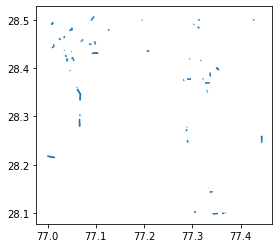

In [136]:
gdf.plot()